Train error: 0.51


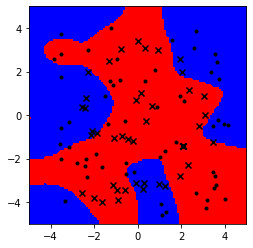

Best C: 0
Best P: 0


In [1]:
import numpy as np
from trainsvm import trainsvm
from crossvalidate import crossvalidate
import matplotlib.pyplot as plt
from visdecision import visdecision
import pickle
import scipy.io as sio
import sys

# Load data
xTr = np.genfromtxt('xTr.csv', delimiter=',')
yTr = np.genfromtxt('yTr.csv', delimiter=',').reshape((xTr.shape[1], 1))
# print("xTr shape:", xTr.shape)
# print("yTr shape:", yTr.shape)

# Train initial classifier
C = 1
P = 1
svmclassify = trainsvm(xTr, yTr, C, 'rbf', P)

# Get training error of initial classifier
train_preds = svmclassify(xTr)
train_error = np.mean(train_preds != yTr)
print("Train error:", train_error)

# Visualize svmclassify on the training set
visdecision(xTr, yTr, svmclassify)
plt.show()

# Do crossvalidation (you will want to test different parameters)
Cs = [1, 10]
Ps = [1, 10]
bestC, bestP, lowest_error, errors = crossvalidate(xTr, yTr, 'rbf', Cs, Ps)

print("Best C:", bestC)
print("Best P:", bestP)

# Save the best parameters to be run on test data by the autorader
best_parameters = {
    'C' : bestC,
    'P' : bestP
}
pickle.dump(best_parameters, open('best_parameters.pickle', 'wb'))
# Don't forget to commit best_parameters.pickle!

# Plot the performance of different parameters (this looks better with more parameter choices)
# x,y = np.array(np.meshgrid(Cs, Ps))
# plt.contourf(x, y, errors)
# plt.colorbar()
# plt.xlabel('C')
# plt.ylabel('P')

# Visualize the best decision boundary on the training set
# best_classifier = trainsvm(xTr, yTr, bestC, 'rbf', bestP)
# visdecision(xTr, yTr, best_classifier)

plt.show()

